# TP5 DA SILVA PEREIRA Théo

# Partie I : Création de l’environnement virtuel et chargement des données

## Exercice 2 : Écrivez un script pour charger les images contenues dans le dossier "images". Vous pouvez utiliser la fonction cv2.imread() pour lire chaque image.

In [ ]:
import cv2
import os
path = "animals_small/"
dirs = os.listdir(path)

for file in dirs:
    cv2.imread(path+file)

# Partie II : Extraction de caractéristiques avec OpenCV

## Exercice 3 Utilisez les méthodes présentées dans le fichier « Image description » pour extraire des caractéristiques à partir des images de votre jeu de données.

In [21]:
def extract_hog_features(image_path):
    image_size=(64, 64)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, image_size)
    hog = cv2.HOGDescriptor(
    _winSize=image_size, # Taille de l'image (fenêtre d'entrée)
    _blockSize=(16, 16), # Taille des blocs
    _blockStride=(8, 8), # Stride entre les blocs<
    _cellSize=(8, 8), # Taille des cellules
    _nbins=9 # Nombre de bins pour les orientations
    )
    hog_descriptor = hog.compute(img_resized)
    return hog_descriptor

for file in dirs:
    image_path = path+file
    #print(image_path)
    image = cv2.imread(image_path)
    hog_features = extract_hog_features(image_path)


## Exercice 4 : Enregistrez ces caractéristiques dans un fichier .csv pour pouvoir le ré-utiliser par la suite

In [22]:
import pandas as pd

list_caracteristiques = []

for file in dirs:
    image_path = path + file
    hog_features = extract_hog_features(image_path)
    list_caracteristiques.append(hog_features.flatten())

df_caracteristiques = pd.DataFrame(list_caracteristiques)

df_caracteristiques.to_csv('hog_features.csv', index=False)

# Partie III : Clustering et évaluation

## Exercice 5 : Calculez le clustering de vos images à partir de toutes les caractéristiques utilisées, en faisant varier les paramètres des algorithmes.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_caracteristiques)

# Définition et application des modèles
kmeans = KMeans(n_clusters=5, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=7, linkage="average", metric="cosine")
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Applications des algorithmes
labels_kmeans = kmeans.fit_predict(scaled_data)
labels_dbscan = dbscan.fit_predict(scaled_data)
labels_hierarchic = agg_clustering.fit_predict(scaled_data)

print(f"Labels KMeans : {labels_kmeans}")
print(f"Labels DBSCAN : {labels_dbscan}")
print(f"Labels Hierarchic : {labels_hierarchic}")

Labels KMeans : [4 0 4 1 4 1 2 1 1 4 1 0 4 4 4 4 0 0 0 4 0 0 0 4 1 1 1 0 0 1 0 4 4 1 0 1 2
 0 4 1 4 4 1 0 0 4 1 1 0 1 4 1 4 0 0 0 1 1 4 4 1 1 0 0 3 1 0 1 4 0 4 3 1 0
 1 0 0 4 0 1 4 4 1 4 0 0 4 4 1 0 1 0 1 0 0 4 1 4 1 0]
Labels DBSCAN : [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
Labels Hierarchic : [2 5 2 3 2 2 3 2 3 2 2 0 2 0 2 1 0 4 1 2 0 0 0 2 2 2 2 0 0 2 0 3 0 2 0 2 3
 0 2 4 2 1 2 0 0 1 2 0 0 6 2 2 2 0 5 1 6 1 4 4 6 2 0 5 2 1 5 2 1 0 1 2 0 0
 2 0 0 2 0 2 2 2 4 0 5 0 5 2 2 0 6 0 3 0 0 2 2 2 5 0]


## Exercice 6 : Utilisez les métriques d'intertie et de silhouette pour évaluer les performances de vos modèles de clustering

In [27]:
from sklearn.metrics import silhouette_score

# Calcul de l'inertie pour KMeans
inertia_kmeans = kmeans.inertia_

# Calcul du score de silhouette pour chaque modèle
silhouette_kmeans = silhouette_score(scaled_data, labels_kmeans)
silhouette_dbscan = silhouette_score(scaled_data, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
silhouette_hierarchic = silhouette_score(scaled_data, labels_hierarchic)

print(f"Inertie KMeans : {inertia_kmeans}")
print(f"Score de silhouette KMeans : {silhouette_kmeans}")
print(f"Score de silhouette DBSCAN : {silhouette_dbscan}")
print(f"Score de silhouette Agglomerative Clustering : {silhouette_hierarchic}")

Inertie KMeans : 158332.21875
Score de silhouette KMeans : 0.01660965383052826
Score de silhouette DBSCAN : -1
Score de silhouette Agglomerative Clustering : -0.030004048720002174


## Exercice 7 : Utilisez la méthode du coude pour choisir le meilleur k pour l'algorithme k-means

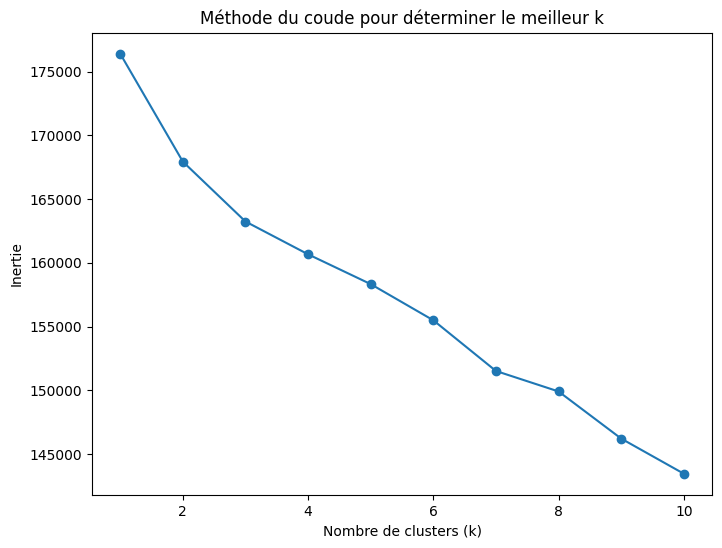

In [29]:
import matplotlib.pyplot as plt

# Calculer l'inertie pour différents nombres de clusters
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le meilleur k')
plt.show()

# Partie IV : Analyse des résultats

## Exercice 8 : Est-il nécessaire d'utiliser toutes les caractéristiques ? Vérifiez quelle(s) caractéristique(s) parmi les 4 calculées est/sont la/les plus performantes (vous pouvez choisir une seule approche de clustering pour faire cette analyse) ?

In [30]:
from sklearn.metrics import silhouette_score

# Sélection des caractéristiques à tester
features_to_test = [0, 1, 2, 3]  # Indices des caractéristiques à tester

# Initialisation des listes pour stocker les scores de silhouette
silhouette_scores = []

# Boucle pour tester chaque caractéristique individuellement
for feature in features_to_test:
    # Sélection de la caractéristique
    data = df_caracteristiques.iloc[:, feature].values.reshape(-1, 1)
    
    # Normalisation de la caractéristique
    scaled_data = scaler.fit_transform(data)
    
    # Application de KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Calcul du score de silhouette
    silhouette = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette)

# Affichage des scores de silhouette pour chaque caractéristique
for i, score in enumerate(silhouette_scores):
    print(f"Score de silhouette pour la caractéristique {i}: {score}")

Score de silhouette pour la caractéristique 0: 0.5698668956756592
Score de silhouette pour la caractéristique 1: 0.5794036984443665
Score de silhouette pour la caractéristique 2: 0.556541383266449
Score de silhouette pour la caractéristique 3: 0.571915328502655
